# Cadena periódica de N osciladores acoplados

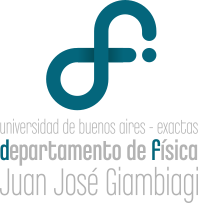  
2021 [Víctor A. Bettachini](mailto:bettachini@df.uba.ar)  
----

Bibliografía:  
- Sección 3.1  
  [Ondas](http://bit.ly/F2Depinev02)  
  Ricardo Depine   
  v.5, 2020

# Enunciado
Enlazadas por resortes de coeficiente de dureza $k$ y longitud natural $l_0$ unas $N$ partículas de masa $m$ en reposo están equiespaciadas en $a$.  
![](figuras/ej1-11.png)
1. Escriba la ecuación de movimiento transversal para la partícula enésima usando la aproximación de ángulos pequeños.
2. Proponga una solución de la forma:
	\\[
		\Psi_{n}^{(p)}(t)=A^{(p)}\cos\left(nk^{(p)}a+\alpha^{(p)}\right)\cos\left(\omega^{(p)}t+\phi^{(p)}\right)
	\\]
	Halle la relación de dispersión y grafíquela.
	¿Depende esta relación de las condiciones de contorno?
	¿Cuánto vale la frecuencia más baja?
	¿Qué representa dicho modo? 
1.  En la figura se muestra el caso de extremos fijos en que una virtual partícula $n=0$ estaría en la pared izquierda y una $n= N+1$ en la derecha.
    Obtenga las frecuencias correspondientes a los modos normales de oscilación transversal para este y escriba la solución general para la partícula enésima. 
1. Ídem. anterior, pero con ambos extremos están libres (atención: ¿cómo sería un _extremo libre_ en esta configuración?).
1. (*) Ídem. anterior, pero con el extremo izquierdo libre y el derecho fijo a la pared. 
1. Particularice los resultados de 3, 4 y 5 para el caso en que \(N = 3\).

# Resolución

## Ecuaciones de movimiento

Excepto las partículas en la extrema izquierda y derecha de la cadena, \\(n=1\\) y \\(n=N\\), todas las fuerzas que actuan son producto del potencial

In [1]:
import sympy as sym
from sympy.physics.mechanics import init_vprinting
init_vprinting() # notación con punto para la velocidad y punto punto para la aceleración

import warnings
warnings.filterwarnings("ignore")

In [2]:
t = sym.Symbol('t')
k,a = sym.symbols('k, a', positive=True) # parámetros físicos

psi_nMinus = sym.Function('\Psi_{n-1}')(t)
psi_n = sym.Function('\Psi_{n}')(t)
psi_nPlus = sym.Function('\Psi_{n+1}')(t)

V = sym.Eq(sym.Function('V')(psi_nMinus, psi_n, psi_nPlus),
           k/2* ( (a**2 + (psi_nPlus- psi_n)**2) + (a**2 + (psi_n- psi_nMinus)**2) ) 
          )
V

Entonces las fuerzas sobre la enésima partícula es

In [3]:
m = sym.Symbol('m', positive=True) # parámetros físicos
sym.Eq(m* psi_n.diff(t,2),  V.rhs.diff(psi_n) ) 

In [4]:
newton_n = sym.Eq(m* psi_n.diff(t,2), -V.rhs.diff(psi_n).simplify() ) 
newton_n

## Modos normales

Estas formulaciones de la 2.a ley de Newton para las \\(N\\) partículas pueden escribirse en forma matricial
\\[
  m \ddot{\vec{\Psi}} 
  = m \begin{bmatrix} \vdots\\ \ddot{\Psi}_{n+1}\\ \ddot{\Psi}_{n}\\ \ddot{\Psi}_{n+1}\\ \vdots \end{bmatrix} 
  = \begin{bmatrix}
  & & \vdots & & & & \\
  \dots & k & -2k & k & & & \\
  & & k & -2k & k & & \\
  & & & k & -2k & k & \dots \\
  & & & & & \vdots & & \\
  \end{bmatrix}
  \begin{bmatrix} \vdots\\ \Psi_{n+1}\\ \Psi_{n}\\ \Psi_{n+1}\\ \vdots  \end{bmatrix} 
  = \mathbb{K} \vec{\Psi}.
\\]
Luego proponiamos una solución exponencial con la misma frecuencia para cada una de las \\(n\\) partículas 
\\[
  \begin{bmatrix} \vdots\\ \Psi_{n+1}\\ \Psi_{n}\\ \Psi_{n+1}\\ \vdots \end{bmatrix} = 
  \begin{bmatrix} \vdots\\ A_{n+1}\\ A_{n}\\ A_{n+1}\\ \vdots \end{bmatrix}
    \operatorname{e}^{i \omega t}
\\]
donde \\(A_i\\) son las amplitudes de dichas oscilaciones.
Reemplazar esta solución en lo anterior nos llevará a tener que resolver un determinante igualado a \\(0\\).
Esto que hicimos para \\(N=2\\) y \\(N=3\\) podría ser insoportablemente tedioso para \\(N\gg 1\\).

### Una solución alternativa a resolver el determinante
Dado que hay \\(N\\) partículas sabemos que el método anterior halla sendas soluciones reales, funciones trigonométricas, para los modos en que todas las partículas oscilan con idéntica frecuencia \\(\omega\\) y fase \\(\phi\\).
En estos \\(p\\) modos, entre los \\(N\\) posibles, la partícula \\(n\\) se mueve según

In [5]:
A_p_n  = sym.Symbol('A_n^{(p)}')
omega_p = sym.Symbol('\omega^{(p)}')
phi_p = sym.Symbol('\phi^{(p)}')
psi_p_n = sym.Eq(sym.Symbol('\Psi_n^{(p)}'), A_p_n* sym.cos(omega_p * t + phi_p ) )
psi_p_n

donde \\(A_n^{(p)}\\) es la amplitud para la párticula \\(n\\).
Ídem. para las partículas vecinas \\(n-1\\) y \\(n+1\\).

In [6]:
A_p_nMinus, A_p_nPlus  = sym.symbols('A_{n-1}^{(p)}, A_{n+1}^{(p)}')
psi_p_nPlus = sym.Eq(sym.Symbol('\Psi_{n+1}^{(p)}'), A_p_nPlus* sym.cos(omega_p * t + phi_p ) )
psi_p_nMinus = sym.Eq(sym.Symbol('\Psi_{n-1}^{(p)}'), A_p_nMinus* sym.cos(omega_p * t + phi_p ) )
psi_p_nPlus, psi_p_nMinus

Se impone tal solución en la 2.a ecuación de Newton para la partícula \\(n\\)

In [7]:
newton_n

y se obtiene

In [8]:
# A_n  = sym.Symbol('A_n')
# omega = sym.Symbol('\omega', positive=True) # parámetros físicos
# newton_n.subs(psi_n, A_n* sym.exp(sym.I* omega* t))
newton_substituciones={
    psi_n: psi_p_n.rhs,
    psi_nMinus: psi_p_nMinus.rhs,
    psi_nPlus: psi_p_nPlus.rhs,
}
newton_substituido = newton_n.subs(newton_substituciones).simplify()
newton_substituido

De aquí puede despejarse una **relación recursiva de amplitudes**

In [9]:
cos = sym.cos(omega_p * t + phi_p )
newton_substituidoPaso1 = sym.Eq( newton_substituido.lhs.expand()/ cos,
                             newton_substituido.rhs/ cos
                            ).expand()
newton_substituidoPaso1

Se efectua la substitución \\(\omega_0^2 = \frac{k}{m}\\)

In [10]:
newton_substituidoPaso2 = sym.Eq( newton_substituidoPaso1.lhs/m,
                                 newton_substituidoPaso1.rhs.subs(k,sym.Symbol('\omega_0^2') )
                                )
newton_substituidoPaso2

Se pueden agrupar a un lado de la igualdad solo las amplitudes y del otro frecuencias

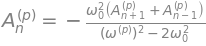

In [11]:
newton_substituidoPaso3 = sym.Eq(A_p_n, sym.solve(newton_substituidoPaso2, A_p_n)[0] )
newton_substituidoPaso3

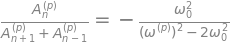

In [12]:
sumaAPlusMinus = newton_substituidoPaso3.rhs.args[3]
newton_substituidoPaso4 = sym.Eq(newton_substituidoPaso3.lhs/ sumaAPlusMinus, newton_substituidoPaso3.rhs/ sumaAPlusMinus)
newton_substituidoPaso4

A la derecha de la igualdad en un cada modo \\(p\\) las \\(\omega\\) son constantes sin dependencia con \\(n\\).
Por tanto la relación de amplitudes a la izquierda se cumple en las \\(N\\) partículas.
Con tres parámetros, \\(\omega^{(p)}\\) y dos \\(A^{(p)}\\) de partículas adyacentes, se pueden obtener las \\(A^{(p)}\\) de todas las demás.

### Amplitudes para cada modo

Sería práctico determinar una formula general para \\(A_n^{(p)}\\) que respete tal relación de amplitudes.
Hay \\(N\\) modos \\(p\\) con sendas relaciones de los \\(A^{(p)}\\) que debieran cumplirse con una única expresión que permita establecer cada \\(A_n^{(p)}\\).


In [13]:
B, C, n, Theta = sym.symbols('B, C, n, \Theta')
únicaA_n_p = sym.Eq(A_p_n, B* sym.cos(n* Theta) + C* sym.sin(n* Theta))
únicaA_n_p

Con las identidades trigonométricas
\\[
    \cos(a \pm b) = \cos(a) \cos(b) \mp \sin(a) \sin(b)
\\]
\\[
    \sin(a \pm b) = \sin(a) \cos(b) \pm \cos(a) \sin(b)
\\]
en el capitulo 2 de [Waves escrito por D. Morin](https://scholar.harvard.edu/david-morin/waves) se demuestra que ésta expresión satisface el sistema de \\(N\\) ecuaciones para \\(A_n{(p)}\\) y
\\[
\begin{aligned}
A_{n+1} 
= B \cos(n+1)\Theta 
&+ C \sin(n+1)\Theta\\
= B (\cos{n \Theta} \cos{\Theta} - \sin{n \Theta} \sin{\Theta} ) 
&+ C ( \sin{n \Theta} \cos{\Theta} + \cos{n \Theta} \sin{\Theta})\\
= B \left(2 \cos{n \Theta} \cos{\Theta} - ( \cos{n \Theta} \cos{\Theta} \sin{n \Theta} \sin{\Theta} ) \right) 
&+ C \left( 2 \sin{n \Theta} \cos{\Theta} - ( \sin{n \Theta} \cos{\Theta} - \cos{n \Theta} \sin{\Theta} ) \right)\\
= 2 \cos{\Theta} \left( B \cos{n \Theta} - C \sin{n \Theta} \right) 
&- \left( B \cos(n-1)\Theta + C \sin(n-1)\Theta \right)\\
= 2 \cos{\Theta} A_{n} 
&- A_{n-1}\\
\frac{A_{n+1} + A_{n-1} }{A_n} 
= 2 \cos{\Theta}&
\end{aligned}
\\]
Entonces
\\[
\begin{aligned}
\frac{A_{n+1} + A_{n-1} }{A_n} 
&= 2- \left( \frac{\omega^{(p)} }{ \omega_0 } \right)^2\\
2 \cos{\Theta}
&= 2- \left( \frac{\omega^{(p)} }{ \omega_0 } \right)^2\\
2 \left( 1 - \cos{\Theta} \right) \omega_0^2
&= \left( \omega^{(p)} \right)^2 \\
\end{aligned}
\\]

### Las \\(\omega^{(p)}\\) las determinan los \\(\Theta\\)

Para buscar los valores de los tres parámetros necesarios para establecer las amplitudes \\(B, C\\) y \\(\Theta\\), ponemos a prueba la expresión

In [14]:
únicaA_n_p

para las únicas _partículas_ para las cuales conocemos la amplitud de oscilación, la \\(n=0\\) y \\(n=N+1\\).
Bien, de acuerdo, no son partículas reales sino unas virtuales que nos sugiere el enunciado imaginemos estarían donde está la pared.
Eso haría que para \\(n=0\\) \\(A_{n=0} = 0\\) 

In [22]:
únicaA_n_p.subs([(A_p_n,0), (n,0)])

En el otro extremo, en \\(n=N+1\\), tendríamos \\(A_{n= N+1} = 0\\)

In [28]:
N = sym.Symbol('N')
únicaA_NPlus_p = únicaA_n_p.subs([(A_p_n,0), (B,0), (n,N+1)])
únicaA_NPlus_p

que obliga a que \\(\Theta\\) sea

In [49]:
theta_NPlus = sym.solve(únicaA_NPlus_p, Theta)
theta_NPlus[1]

y de hecho cualquier múltiplo por \\(p \in \mathbb{N}\\) de esto también es un \\(\Theta\\) válido para este caso.

Ahora están definidas
\\[
\omega^{(p)} 
= \sqrt{2 \left(1 - \cos \left(\Theta \right) \right) } \omega_0
= \sqrt{2 \left(1 - \cos \left(\frac{p \pi}{N+1} \right) \right) } \omega_0
= 2 \sin \left(\frac{p \pi}{2 (N+ 1) } \right) \omega_0
\\]
donde se hizo uso de la identidad trigonemétrica \\((1- \cos{x} ) = 2 \sin^2{\frac{x}{2}}\\).

Aquí queda en claro porque se identificó con \\(p\\) el entero que impone los posibles \\(\Theta\\).
Con \\(N\\) grados de libertad las frecuencias (y modos) posibles son todos los \\(p \leq N\\) con \\(p \in \mathbb{N}\\).
Si en la expresión para \\(\omega^{(p)}\\) se multiplicara por el entero \\(N+1\\) tal frecuencia sería nula, y si se lo hiciera por un entero \\(> N+1\\), ¡negativa!

### Relación de dispersión

Recordemos que buscamos calcular las \\(A_n^{(p)}\\) en

In [62]:
psi_p_n

que en el caso general responden a

In [61]:
psi_p_n.subs(únicaA_n_p.lhs, únicaA_n_p.rhs)

La solución con las condiciones en \\(n=0\\) y \\(n=N+1\\) queda reducida a

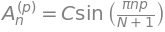

In [53]:
p = sym.Symbol('p', positive= True)
substitucionesFijoFijo ={
    B: 0,
    Theta: p* theta_NPlus[1]
}
A_n_pFijoFijo = únicaA_n_p.subs(substitucionesFijoFijo)
A_n_pFijoFijo

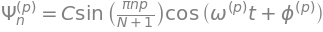

In [56]:
psi_p_n.subs(A_p_n, A_n_pFijoFijo.rhs)

En cada modo la función trigonométrica con \\(t\\) presenta una periodicidad \\(T^{(p)} = \frac{2 \pi}{\omega^{(p)}} \\).
En la función que depende de una coordenada espacial, en que \\(n\\) se evalúa \\(A_n^{(p)}\\), hay otra periodicidad
\\[
2 \pi \left( \frac{p \pi}{N+1} \right)^{-1} = \frac{2 \pi}{\Theta}
\\]

por lo que \\(\Theta)\\) puede interpretarse como una frecuencia espacial.
Es razonable que si \\(T\\) sea una magnitud de tiempo, la de un período espacial sea de longitud.
Para eso hay que reformular una \\(\Theta'\\) para que tenga una unidad recíproca de la de longitud, e.g. \\(m^{-1}\\) y \\(\Psi_n^{(p)}\\) tenga por dependencia espacial 
\\[
\sin\left( \Theta' x \right) .
\\]

Esto requiere un cambio de variables basado en que las \\(N\\) partículas están equiespaciadas en \\(a\\) y tienen por coordenada \\(x_n = a n\\).
